## Analysis
```
1. Urban areas have the highest number of rides and drivers
2. While Rural areas have the least number of rides, they have the highest average fare cost
3. Even though urban areas have higher average fare costs, urban areas still responsible for
    the majority of fare revenue generated
```

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


city_csvpath = os.path.join('raw_data', 'city_data.csv')
ride_csvpath = os.path.join('raw_data', 'ride_data.csv')

city_df = pd.read_csv(city_csvpath)
ride_df = pd.read_csv(ride_csvpath)

city_ride_df = ride_df.merge(city_df, on='city')
city_ride_df.head(3)

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban


In [12]:
## Average Fare ($) Per City
city_grouby = city_ride_df.groupby('city')
average_fare_df = city_grouby.mean()
average_fare_df = average_fare_df[['fare']]

## Total Number of Rides Per City
city_grouby = city_ride_df.groupby('city')
total_rides = city_grouby.size()
total_rides.name = 'Total Rides'
total_rides_df = pd.DataFrame(total_rides)

# Total Number of Drivers Per City
scatter_plot_df = city_df[['city', 'driver_count', 'type']]

# merge the three objects
scatter_plot_df = scatter_plot_df.merge(average_fare_df, left_on='city', right_index=True)
scatter_plot_df = scatter_plot_df.merge(total_rides_df, left_on='city', right_index=True)
scatter_plot_df.head(3)

,city,driver_count,type,fare,Total Rides
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22


## Build Bubble Plot that showcases the relationship between:
```
Average Fare ($) Per City
Total Number of Rides Per City
Total Number of Drivers Per City
City Type (Urban, Suburban, Rural)
```

In [13]:
types = ['Urban', 'Suburban', 'Rural']
colors = ['red', 'gold', 'blue']
plt.style.use('ggplot')

for i in range(0, len(types)):
    city_type = types[i]
    color = colors[i]
    df = scatter_plot_df[scatter_plot_df['type'] == city_type]
    ## Filter out an outlier identified during initial plotting
    df = df[df['Total Rides'] < 60]
    plt.scatter(df['Total Rides'], df['fare'],
                s=df['driver_count'], alpha=.7,
                 edgecolor='black', c=color, label=city_type)
plt.legend(title='City Types')

## Add Chart elements
```
Chart title
Axes titles
Key
Note about circle size
```

In [14]:
title = 'Pyber Ride Sharing Data (2016)'
x_axis_label = 'Total Number of Rides (Per City)'
y_axis_label = 'Average Fare ($)'
note = 'Note: Circle size correlates to driver count'

plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.text(15,37,note)

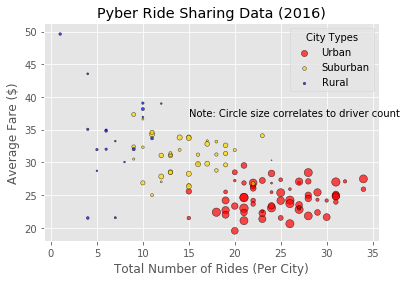

In [15]:
plt.show()

## Total Fares by City Type

```% of Total Fares by City Type```

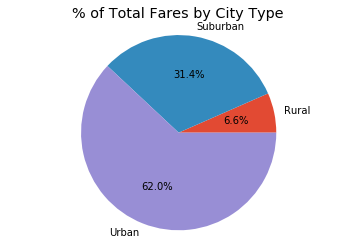

In [6]:
title = '% of Total Fares by City Type'
plt.style.use('ggplot')
type_grouby = city_ride_df.groupby('type')
total_fare_df = type_grouby.sum()
total_fare_df = total_fare_df[['fare']]
total_fare_df.plot.pie(subplots=True, legend=False, autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.title(title)
plt.axis('equal')
plt.show()

```% of Total Rides by City Type```

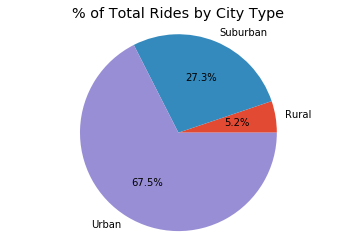

In [7]:
title = '% of Total Rides by City Type'
plt.style.use('ggplot')
type_grouby = city_ride_df.groupby('type')
total_rides_series = type_grouby.size()
total_rides_series.plot.pie(subplots=True, legend=False, autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.title(title)
plt.axis('equal')
plt.show()

```% of Total Drivers by City Type```

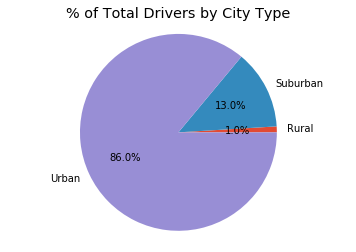

In [8]:

title = '% of Total Drivers by City Type'
plt.style.use('ggplot')
type_grouby = city_ride_df.groupby('type')
total_drivers_df = type_grouby.sum()
total_drivers_df = total_drivers_df[['driver_count']]
total_drivers_df.plot.pie(subplots=True, legend=False, autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.title(title)
plt.axis('equal')
plt.show()